### Team Member
* Shrooq Abu Awaily 


# Deep Learning & Computer Vision - Project 2

In this project, I create a classifier that classifies the photos of faces to two categories (With Mask, or Without Mask), then I use OpenCV Haar Cascade face detector and label people in the camera.

This dataset is downloaded from Kaggle, https://www.kaggle.com/datasets/ashishjangra27/face-mask-12k-images-dataset, notice that you could learn and understand how others built their model.

## Importing Libraries
As usual, in this section, you will import the needed libraries.

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn import svm
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, SpatialDropout2D, BatchNormalization, Input,Activation, Dense, Flatten
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import plot_model
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.models import Model,save_model


### Sample of the dataset
In this sample, you should load a sample of training data, this section is for preview only, you will load the data later!

In [ ]:
with_mask_files = os.listdir("./masks_dataset/Train/WithMask")
without_mask_files =  os.listdir("./masks_dataset/Train/WithoutMask")

with_mask_paths = ["./masks_dataset/Train/WithMask/" + file for file in with_mask_files]
without_mask_paths = ["./masks_dataset/Train/WithoutMask/" + file for file in without_mask_files]
training_paths = with_mask_paths + without_mask_paths
print("Number of training images: %d" % len(training_paths))

Number of training images: 10000


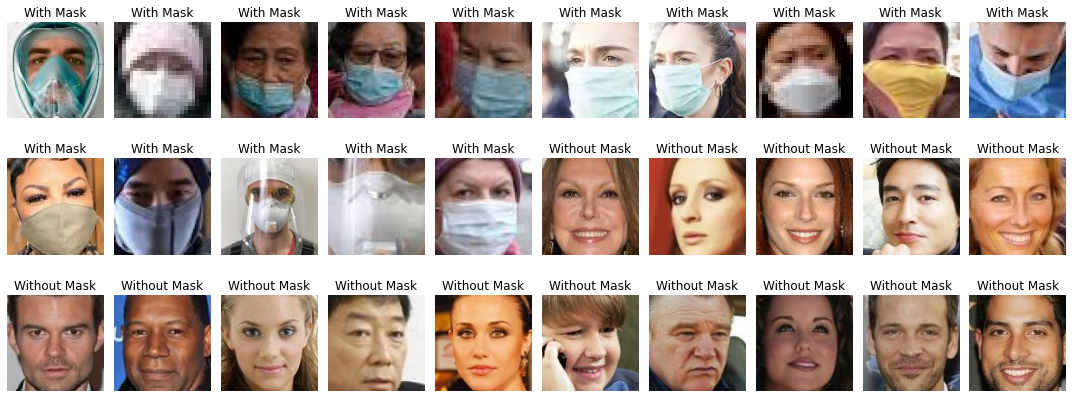

In [ ]:
fig, axs = plt.subplots(3, 10, figsize=(15,6))
for i in range(15):
    axs.flat[i].imshow(plt.imread(with_mask_paths[i]))
    axs.flat[i].set_title(str("With Mask"))
    axs.flat[i].axis('off')
for i in range(15):
    axs.flat[i+15].imshow(plt.imread(without_mask_paths[i]))
    axs.flat[i+15].set_title(str("Without Mask"))
    axs.flat[i+15].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
for dirpath,dirnames,filenames in os.walk("./masks_dataset/"):
    print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

there are 3 directories and 0 images in './masks_dataset/'.
there are 2 directories and 0 images in './masks_dataset/Test'.
there are 0 directories and 483 images in './masks_dataset/Test\WithMask'.
there are 0 directories and 509 images in './masks_dataset/Test\WithoutMask'.
there are 2 directories and 0 images in './masks_dataset/Train'.
there are 0 directories and 5000 images in './masks_dataset/Train\WithMask'.
there are 0 directories and 5000 images in './masks_dataset/Train\WithoutMask'.
there are 2 directories and 0 images in './masks_dataset/Validation'.
there are 0 directories and 400 images in './masks_dataset/Validation\WithMask'.
there are 0 directories and 400 images in './masks_dataset/Validation\WithoutMask'.


## Creating and Testing Classifier
In this section, you should create your classifier, either by building it from scratch or using transfer learning (You could use MobileNet or anything you like).

You should build **three** models, and compare the results of them:
1. HOG + SVM model
2. Your original CNN.
3. Modified model using transfer learning.

### Creating Model #1 (HOG + SVM)
In this section, you should create an SVM model, notice that you should get the HOG feature of the images (Return to Lab 5), and don't forget to scale images first.

In [ ]:
train_data=[]
train_labels=[]

no_mask=os.listdir("./masks_dataset/Train/WithoutMask/")
for a in no_mask:
    image = cv2.imread("./masks_dataset/Train/WithoutMask/"+a,)
    image = cv2.resize(image, (128, 128))
    train_data.append(image)
    train_labels.append(0)
    
mask=os.listdir("./masks_dataset/Train/WithMask/")
for a in mask:
    image = cv2.imread("./masks_dataset/Train/WithMask/"+a,)
    image = cv2.resize(image, (128, 128))
    train_data.append(image)
    train_labels.append(1)
    

In [ ]:
test_data=[]
test_labels=[]

no_mask=os.listdir("./masks_dataset/Test/WithoutMask/")
for a in no_mask:
    image = cv2.imread("./masks_dataset/Test/WithoutMask/"+a,)
    image = cv2.resize(image, (128, 128))
    test_data.append(image)
    test_labels.append(0)

mask=os.listdir("./masks_dataset/Test/WithMask/")
for a in mask:
    image = cv2.imread("./masks_dataset/Test/WithMask/"+a,)
    image = cv2.resize(image, (128, 128))
    test_data.append(image)
    test_labels.append(1)

In [ ]:
train_data = np.array(train_data) / 255.0
test_data = np.array(test_data) / 255.0
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

In [ ]:
train_data.shape ,test_data.shape

((10000, 128, 128, 3), (992, 128, 128, 3))

In [ ]:
hog_data = cv2.HOGDescriptor(_winSize=(128, 128), _blockSize=(4,4), 
                        _blockStride=(4,4), _cellSize=(4,4), _nbins=9)

In [ ]:
train_images_uint8 = train_data.astype('uint8')
train_images_hog = np.empty((train_data.shape[0], hog_data.getDescriptorSize()))

count = 0
for image in train_images_uint8:
    cv_fd = hog_data.compute(image)
    train_images_hog[count] = cv_fd
    count += 1

print(train_images_hog.shape)

(10000, 9216)


In [ ]:
test_images_uint8 = test_data.astype('uint8')
test_images_hog = np.empty((test_data.shape[0], hog_data.getDescriptorSize()))
count = 0
for image in test_images_uint8:
    cv_fd2 = hog_data.compute(image)
    test_images_hog[count] = cv_fd2
    count += 1

In [ ]:
clf = svm.LinearSVC()
clf_history = clf.fit(train_images_hog, train_labels)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [ ]:
%time
predicted_labels = clf.predict(test_images_hog)

Wall time: 0 ns


In [ ]:
print(predicted_labels[:10])
print(test_labels[:10])

[0 0 0 0 0 1 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0]


#### Evaluating Model #1
Please use the folder "./masks_dataset/Test" to evaluate your model.

Accuracy: 73.28629032258065%


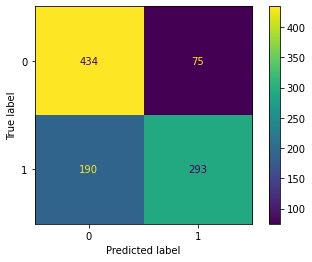

In [ ]:
from sklearn import metrics
acc = metrics.accuracy_score(test_labels, predicted_labels)
print ("Accuracy: "+str(acc*100)+"%")

metrics.plot_confusion_matrix(clf, test_images_hog, test_labels)
plt.show()

### Creating Model #2 (Your own CNN)
In this section, you should create your own CNN and train it, please don't panic and waste a lot of time training this model (You could write about how hard it is in your evaluation!).

#### Loading Data (!Important)
In this section you should load the data for your model, you could use the Keras built-in class `ImageDataGenerator` like the following.

In [ ]:
image_generator = ImageDataGenerator()
training_images = image_generator.flow_from_directory("./masks_dataset/Train", target_size=(128, 128))
validation_images = image_generator.flow_from_directory("./masks_dataset/Validation", target_size=(128, 128))
testing_images = image_generator.flow_from_directory("./masks_dataset/Test", target_size=(128, 128))

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


#### Creating Model

In [ ]:
num_classes = 2 # WithMask, WithoutMask
input_shape = (128,128,3)
input_image = Input(shape=input_shape)
cnn_model = Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=input_shape)(input_image)
cnn_model = MaxPool2D((2, 2),padding='same')(cnn_model)
cnn_model = Conv2D(32, (3, 3), activation='relu', padding='same')(cnn_model)
cnn_model = MaxPool2D((2, 2),padding='same')(cnn_model)
cnn_model = Conv2D(64, (3, 3), activation='relu', padding='same')(cnn_model)
cnn_model = MaxPool2D((2, 2),padding='same')(cnn_model)
cnn_model = Conv2D(128, (3, 3), activation='relu', padding='same')(cnn_model)
cnn_model = MaxPool2D((2, 2),padding='same')(cnn_model)
cnn_model = Conv2D(256, (3, 3), activation='relu', padding='same')(cnn_model)
cnn_model = MaxPool2D((2, 2),padding='same')(cnn_model)
cnn_model = Flatten()(cnn_model)
cnn_model = Dense(1024)(cnn_model)
cnn_model = Dense(64)(cnn_model)
output= Dense(num_classes, activation='softmax')(cnn_model)
cnn_model = Model(inputs=[input_image], outputs=[output])
cnn_model.summary()
cnn_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 128, 128, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)       

In [ ]:
STEP_SIZE_TRAIN=training_images.n//training_images.batch_size
STEP_SIZE_VALID=testing_images.n//testing_images.batch_size
STEP_SIZE_TEST =validation_images.n//validation_images.batch_size
num_epochs = 10

cnn_history = cnn_model.fit_generator(training_images,steps_per_epoch=STEP_SIZE_TRAIN,epochs=num_epochs, 
                        validation_data=validation_images, validation_steps=STEP_SIZE_VALID) 

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
312/312 [==============================] - 139s 447ms/step - loss: 4.5647 - accuracy: 0.9041 - val_loss: 0.0711 - val_accuracy: 0.9700
Epoch 2/10
312/312 [==============================] - 147s 472ms/step - loss: 0.0811 - accuracy: 0.9706
Epoch 3/10
312/312 [==============================] - 169s 542ms/step - loss: 0.0543 - accuracy: 0.9820
Epoch 4/10
312/312 [==============================] - 140s 450ms/step - loss: 0.0339 - accuracy: 0.9878
Epoch 5/10
312/312 [==============================] - 137s 441ms/step - loss: 0.0521 - accuracy: 0.9820
Epoch 6/10
312/312 [==============================] - 142s 457ms/step - loss: 0.0271 - accuracy: 0.9906
Epoch 7/10
312/312 [==============================] - 156s 500ms/step - loss: 0.0304 - accuracy: 0.9894
Epoch 8/10
312/312 [==============================] - 149s 479ms/step - loss: 0.0250 - accuracy: 0.9917
Epoch 9/10
312/312 [==============================

#### Evaluating Model #2

In [ ]:
cnn_model.evaluate (testing_images)

31/31 [==============================] - 5s 161ms/step - loss: 0.2148 - accuracy: 0.9506


[0.21480387449264526, 0.9506048560142517]

### Creating Model #3 (Modify an existing model)
You could use any model you like, use the following link to see the available models in Keras:
https://keras.io/api/applications/

Don't forget to create your model with `include_top = False`, so you could omit the top layers, and freeze weights using `.trainable = False`.

#### Loading Data
Again, you will use Image Data Generator to load your images, you could use `preprocessing_function` to preprocess the images for your ceratin model (In the next example we will use `mobilenet`).

In [ ]:
# IMPORTANT EDIT preprocessing_function
image_generator = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input)
training_images = image_generator.flow_from_directory("./masks_dataset/Train", target_size=(224, 224))
validation_images = image_generator.flow_from_directory("./masks_dataset/Validation", target_size=(224, 224))
testing_images = image_generator.flow_from_directory("./masks_dataset/Test", target_size=(224, 224))

print("Classes:", training_images.class_indices)

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.
Classes: {'WithMask': 0, 'WithoutMask': 1}


#### Creating Model

In [ ]:
base_model = tf.keras.applications.MobileNet(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
model_3 = keras.Sequential()
model_3.add(base_model)
model_3.add(layers.Flatten())
model_3.add(layers.Dense(2, activation="softmax"))

In [ ]:
model_3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Function (None, 7, 7, 1024)        3228864   
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 100354    
Total params: 3,329,218
Trainable params: 100,354
Non-trainable params: 3,228,864
_________________________________________________________________


In [ ]:
model_3.compile(optimizer="adam", loss="categorical_crossentropy", metrics ="accuracy")

In [ ]:
EPOCHS = 10
history_3 = model_3.fit_generator(training_images,
                               steps_per_epoch=len(training_images)//training_images.batch_size,
                               validation_data=validation_images, 
                               validation_steps=len(validation_images)//validation_images.batch_size,
                               epochs=EPOCHS)

Epoch 1/10
9/9 [==============================] - 7s 771ms/step - loss: 2.1314 - accuracy: 0.8299
Epoch 2/10
9/9 [==============================] - 7s 798ms/step - loss: 0.3564 - accuracy: 0.9722
Epoch 3/10
9/9 [==============================] - 8s 850ms/step - loss: 0.4143 - accuracy: 0.9826
Epoch 4/10
9/9 [==============================] - 10s 1s/step - loss: 0.1443 - accuracy: 0.9931
Epoch 5/10
9/9 [==============================] - 10s 1s/step - loss: 0.0595 - accuracy: 0.9965
Epoch 6/10
9/9 [==============================] - 9s 973ms/step - loss: 0.3939 - accuracy: 0.9931
Epoch 7/10
9/9 [==============================] - 9s 969ms/step - loss: 0.2070 - accuracy: 0.9931
Epoch 8/10
9/9 [==============================] - 8s 914ms/step - loss: 0.0144 - accuracy: 0.9965
Epoch 9/10
9/9 [==============================] - 9s 957ms/step - loss: 0.0164 - accuracy: 0.9963
Epoch 10/10
9/9 [==============================] - 9s 945ms/step - loss: 0.1826 - accuracy: 0.9896


#### Evaluate Model #3
Use your testing images to evaluate your model!

In [ ]:
model_3.evaluate (testing_images)

31/31 [==============================] - 32s 1s/step - loss: 0.0444 - accuracy: 0.9970


[0.04439416527748108, 0.9969757795333862]

In [ ]:
model_name = "mask_detection_best.h5"
tf.keras.models.save_model(model_3, model_name)

## Models Compersion
In this section, you should compare your three models using any criteria you like, you should draw the accuracy over epoch for model #2 and model #3, and Draw any graphs you feel that are important (Maybe the time for training and prediction).

You could write code, write text, anything is allowed in this section, so feel free to write anything!

In [ ]:
def plot_loss(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['loss'], label='loss')
    plt.xlabel('Epoch')
    plt.ylabel('accuracy')
    plt.legend()
    plt.grid(True)

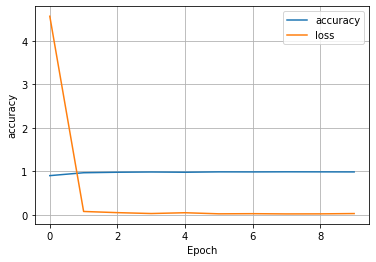

In [ ]:
plot_loss(cnn_history)

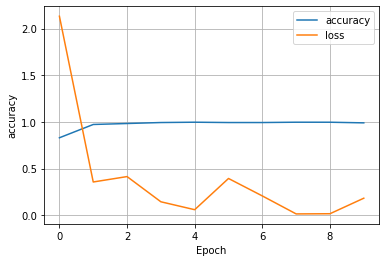

In [ ]:
plot_loss(history_3)

### Create Haar Cascade Face Detector
In this section, you should create a cascade face detector, use the codes from Lab 5 and modify it so the detector should classify each face as `With Mask` or `Without Mask`.

In [ ]:
# Don't forget to preprocess your classifier input for model #3 if you used model #3
from tensorflow.keras.applications.mobilenet import preprocess_input

#### Create your Haar Cascade detector

In [ ]:
import cv2
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np

%config Completer.use_jedi = False

In [ ]:
face_classifier = cv2.CascadeClassifier("haar_data/haarcascade_frontalface_alt.xml")
mask_detection = tf.keras.models.load_model("mask_detection_best.h5")

In [ ]:
text_mask = "With Mask"
text_no_mask = "Without Mask"
font = cv2.FONT_HERSHEY_SIMPLEX
scale = 0.8

In [ ]:
def predict(image):
    
    face_frame = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    face_frame = cv2.resize(face_frame, (224, 224))
    face_frame = img_to_array(face_frame)
    face_frame = np.expand_dims(face_frame, axis=0)
    face_frame =  preprocess_input(face_frame)
    prediction = mask_detection.predict(face_frame)
    
    return prediction[0][0]

In [ ]:
def detector(gray_image, frame):
    faces = face_classifier.detectMultiScale(gray_image, 1.1, 5)
    
    for (x,y,w,h) in faces:

        roi_color = frame[y:y+h, x:x+w]
        mask = predict(roi_color)

        
        if mask > 0.5:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0,255,0), 2)
            cv2.putText(frame, text =text_mask, org =(x+50,y-100), fontFace =font, fontScale = scale, color =(0,255,0),
            thickness = 2)
        
        elif mask<=0.5:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0,0,255), 2)
            cv2.putText(frame, text =text_no_mask, org =(x+50,y-100), fontFace =font, fontScale = scale , color =(0,0,255),
            thickness = 2)
            
    return frame

#### Test Your Results on Your photo

In [ ]:
orig = cv2.imread("2.jpg")
orig = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)

faces = face_classifier.detectMultiScale(orig, 1.1, 5)
    
for (x,y,w,h) in faces:

    roi_color = orig[y:y+h, x:x+w]
    mask = predict(roi_color)


    if mask > 0.5:
        cv2.rectangle(orig, (x, y), (x+w, y+h), (0,255,0), 2)
        cv2.putText(orig, text =text_mask, org =(x+50,y-100), fontFace =font, fontScale = scale, color =(0,255,0),
        thickness = 2)

    elif mask<=0.5:
        cv2.rectangle(orig, (x, y), (x+w, y+h), (0,0,255), 2)
        cv2.putText(orig, text =text_no_mask, org =(x+50,y-100), fontFace =font, fontScale = scale , color =(0,0,255),
        thickness = 2)


plt.figure(figsize=(10,10))
plt.imshow(orig)
plt.axis("off")
plt.show()

In [ ]:
orig = cv2.imread("3.jpg")
orig = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)

faces = face_classifier.detectMultiScale(orig, 1.1, 5)
    
for (x,y,w,h) in faces:

    roi_color = orig[y:y+h, x:x+w]
    mask = predict(roi_color)


    if mask > 0.5:
        cv2.rectangle(orig, (x, y), (x+w, y+h), (0,255,0), 2)
        cv2.putText(orig, text =text_mask, org =(x+50,y-100), fontFace =font, fontScale = scale, color =(0,255,0),
        thickness = 2)

    elif mask<=0.5:
        cv2.rectangle(orig, (x, y), (x+w, y+h), (0,0,255), 2)
        cv2.putText(orig, text =text_no_mask, org =(x+50,y-100), fontFace =font, fontScale = scale , color =(0,0,255),
        thickness = 2)


plt.figure(figsize=(10,10))
plt.imshow(orig)
plt.axis("off")
plt.show()

#### Create a detector with the Camera

In [ ]:
video_cap = cv2.VideoCapture(0)

while True:
    
    ret, frame = video_cap.read()
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
     
    detect = detector(gray_frame, frame)
    
    cv2.imshow("Video", detect)
    
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break
        
video_cap.release()
cv2.destroyAllWindows()

<center>
    <h4>End of Project 2</h4>
</center>